<a href="https://colab.research.google.com/github/santiagopinzon92/PredictiveSoilMapping/blob/master/Evaluacion_formativa_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

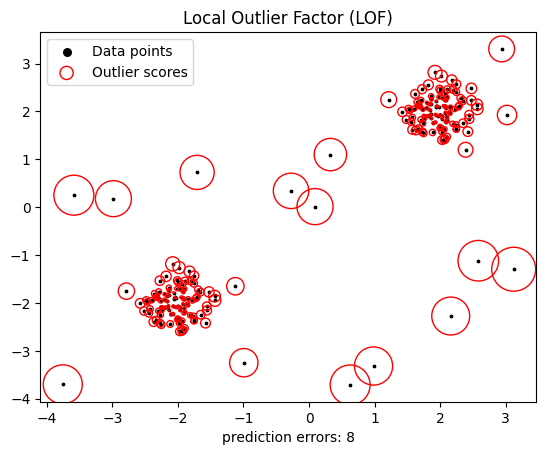

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n = len(X)
n_inliers = len(X_inliers)
n_outliers = len(X_outliers)

ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)

n_errors = (y_pred != ground_truth).sum()

X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
sc_points = plt.scatter(
    X[:, 0], X[:, 1],
    color='k',
    s=3,
    label='Data points'
)

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

sc_circles = plt.scatter(
    X[:, 0], X[:, 1],
    s=1000 * radius,
    edgecolors='red',
    facecolors='none',
    label='Outlier scores'
)

plt.autoscale()
plt.xlabel(f"prediction errors: {n_errors}")

leg = plt.legend(handles=[sc_points, sc_circles],
                 labels=['Data points', 'Outlier scores'],
                 loc='upper left')
leg.legend_handles[0].set_sizes([30])
leg.legend_handles[1].set_sizes([90])

plt.show()

-Genera datos "normales" (inliers)
Crea 100 puntos aleatorios con distribución normal (campana de Gauss).
Los escala por 0.3 para que estén más agrupados.
Duplica estos puntos: unos los desplaza +2 y otros -2 → forma dos nubes compactas de datos normales (una arriba-derecha y otra abajo-izquierda).

-Genera 20 outliers artificiales
Usa np.random.uniform(-4, 4) para crear puntos distribuidos uniformemente en un área grande.
Estos puntos quedan fuera de las dos nubes compactas → son los verdaderos outliers.

Une todos los datos en una sola matriz X
→ Total: 220 puntos (200 inliers + 20 outliers).
Crea la etiqueta real (ground truth)
1 = punto normal
-1 = outlier
Esto sirve para luego contar cuántos errores comete el algoritmo.

-Aplica el algoritmo Local Outlier Factor (LOF)Pythonclf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
n_neighbors=20: mira los 20 vecinos más cercanos de cada punto.
contamination=0.1: asume que aproximadamente el 10% de los datos son outliers.

Predice qué puntos son outliers
Devuelve -1 para outliers y 1 para inliers.

Calcula cuántos errores cometió
Compara la predicción con la verdad real.
Grafica el resultado (lo más visual y didáctico)
Todos los puntos en negro.
Alrededor de cada punto dibuja un círculo rojo cuyo tamaño es proporcional al score de outlier (cuanto más grande el círculo → más raro es el punto).
Los outliers reales suelen tener círculos grandes y bien visibles.
Muestra en el título cuántos errores tuvo el algoritmo.